In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
# Load the raw dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw_dataset_week_4.csv')
df.head()

,Date,Customer_ID,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality,Sales,Customer_Churn,Defaulted
0,12-04-24,1,56,Female,142418.0,7,391.0,8083.0,1,15376,3,Low,32526,0,0
1,21-02-24,2,69,Male,63088.0,82,652.0,34328.0,2,6889,6,Low,78493,0,0
2,02-04-24,3,46,Male,136868.0,91,662.0,47891.0,2,6054,29,Medium,57198,1,0
3,15-01-24,4,32,Female,NaN,34,644.0,25103.0,2,4868,8,Medium,48395,0,0
4,16-04-24,5,60,Male,59811.0,91,469.0,44891.0,1,17585,12,High,29031,1,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Replace missing values with the mean for numeric columns
df.fillna(df.mean(numeric_only=True), inplace=True)

In [ ]:
# 3. Identify which columns are numeric (so that string columns aren’t included in the IQR step)
numeric_cols = df.select_dtypes(include='number').columns

# 4. Compute Q1, Q3, and IQR on just the numeric subset
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# 5. Build a boolean mask for rows that do NOT contain any numeric outliers
is_outlier = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
              (df[numeric_cols] > (Q3 + 1.5 * IQR)))
mask_keep = ~is_outlier.any(axis=1)

# 6. Filter the DataFrame by that mask (this preserves non‐numeric columns intact)
df = df[mask_keep].reset_index(drop=True)

# 7. (Optional) Confirm that it worked
print("Remaining rows after outlier removal:", df.shape[0])
df.head()


In [12]:
df.to_csv('cleaned_data.csv', index=False)
print('Cleaned data saved to cleaned_data.csv')

Cleaned data saved to cleaned_data.csv


In [13]:
import pandas as pd
df = pd.read_csv("cleaned_data.csv")
df.head()

,Date,Customer_ID,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality,Sales,Customer_Churn,Defaulted
0,12-04-24,1,56,Female,142418.0,7,391.0,8083.0,1,15376,3,Low,32526,0,0
1,21-02-24,2,69,Male,63088.0,82,652.0,34328.0,2,6889,6,Low,78493,0,0
2,02-04-24,3,46,Male,136868.0,91,662.0,47891.0,2,6054,29,Medium,57198,1,0
3,15-01-24,4,32,Female,NaN,34,644.0,25103.0,2,4868,8,Medium,48395,0,0
4,16-04-24,5,60,Male,59811.0,91,469.0,44891.0,1,17585,12,High,29031,1,0


<ipython-input-14-b9fff3724afb>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])  # If there's a Date column


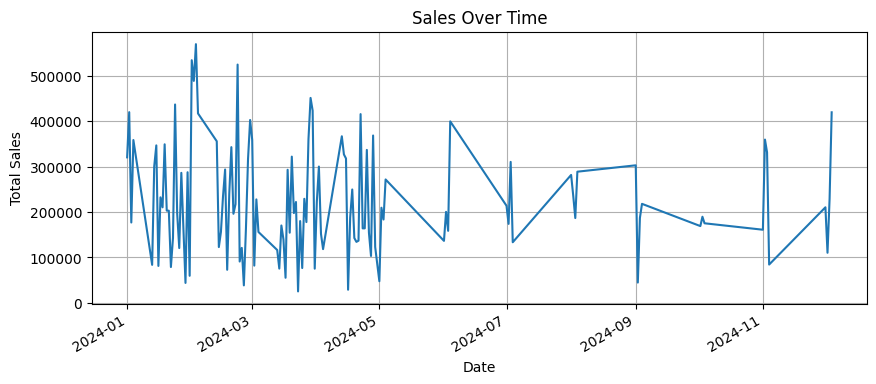

In [14]:
#sales overtime
#📊 2. Generate Visual Insights with seaborn and matplotlib

import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  # If there's a Date column
df.groupby('Date')['Sales'].sum().plot(kind='line', figsize=(10, 4), title='Sales Over Time')
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


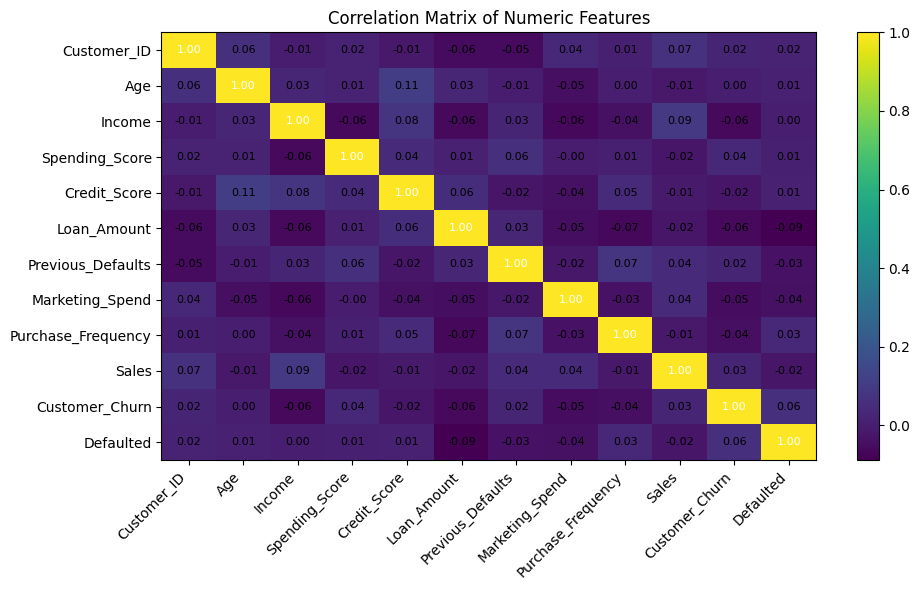

In [15]:
# Assuming df is already defined and cleaned from previous steps

# 1. Identify numeric columns for correlation
numeric_cols = df.select_dtypes(include='number').columns

# 2. Compute the correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

# 3. Plot heatmap using matplotlib (no seaborn, no explicit color settings)
plt.figure(figsize=(10, 6))
im = plt.imshow(corr_matrix, aspect='auto')
plt.colorbar(im)

# 4. Configure ticks and labels
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)

# 5. Annotate each cell with the correlation value
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', fontsize=8, color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')

plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

*Step 3: Alternative Method – Train a Model in Python*

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. One-hot encode the 'Seasonality' column
X = df[['Marketing_Spend', 'Seasonality']]
X = pd.get_dummies(X, columns=['Seasonality'], drop_first=True)  # drop_first avoids multicollinearity

y = df['Sales']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Model MSE: {mse}")


Model MSE: 849483521.7457564
